In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
train=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\GDZ\Training\train_with_time_features.csv')
test=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\GDZ\Training\test_with_time_features.csv')

In [2]:
train

,tarih,ilce_0,ilce_1,bildirimsiz_sum,bildirimli_sum,t_2m:C_min,t_2m:C_max,t_2m:C_mean,effective_cloud_cover:p_min,effective_cloud_cover:p_max,...,prob_precip_1h:p_mean,t_apparent:C_min,t_apparent:C_max,t_apparent:C_mean,Bayram_Flag,day_of_week,month,year,quarter,day_of_year
0,2021-01-01,1,1,9,0,9.0,14.9,11.133333,30.5,75.0,...,1.000000,8.4,17.8,11.837500,1,4,1,2021,1,1
1,2021-01-01,0,33,11,0,8.5,13.1,10.383333,17.7,81.3,...,1.000000,7.5,15.7,10.637500,1,4,1,2021,1,1
2,2021-01-01,1,34,5,0,8.7,16.0,11.675000,3.1,76.0,...,1.000000,8.3,19.4,12.558333,1,4,1,2021,1,1
3,2021-01-01,0,30,13,0,9.6,14.1,11.204167,31.1,96.5,...,1.595833,9.0,16.7,11.804167,1,4,1,2021,1,1
4,2021-01-01,0,10,2,0,10.6,14.4,11.929167,29.3,87.7,...,1.200000,10.7,16.9,12.645833,1,4,1,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46939,2024-01-03,0,19,1,0,11.8,18.3,14.679167,9.1,99.8,...,1.825000,11.9,20.0,15.433333,0,2,1,2024,1,3
46940,2024-01-03,0,20,6,2,8.4,16.8,12.041667,16.8,100.0,...,2.212500,6.7,18.5,12.570833,0,2,1,2024,1,3
46941,2024-01-03,0,21,1,0,12.1,18.3,14.987500,14.0,99.7,...,1.000000,12.4,20.6,15.891667,0,2,1,2024,1,3
46942,2024-01-03,0,23,1,0,9.1,15.6,12.083333,0.4,100.0,...,2.729167,8.3,19.0,12.850000,0,2,1,2024,1,3


In [3]:
data = [
    ('2023-12-03', 40), ('2023-12-04', 42), ('2023-12-05', 39), ('2023-12-06', 42),
    ('2023-12-07', 45), ('2023-12-08', 46), ('2023-12-09', 42), ('2023-12-10', 43),
    ('2023-12-11', 43), ('2023-12-12', 43), ('2023-12-13', 45), ('2023-12-14', 44),
    ('2023-12-15', 43), ('2023-12-16', 45), ('2023-12-17', 45), ('2023-12-18', 42),
    ('2023-12-19', 44), ('2023-12-20', 42), ('2023-12-21', 45), ('2023-12-22', 44),
    ('2023-12-23', 41), ('2023-12-24', 43), ('2023-12-25', 42), ('2023-12-26', 44),
    ('2023-12-27', 45), ('2023-12-28', 42), ('2023-12-29', 42), ('2023-12-30', 40),
    ('2023-12-31', 37), ('2024-01-01', 34), ('2024-01-02', 44), ('2024-01-03', 41)
]

# Sağdaki sayıların toplamını hesapla
toplam = sum(sayi for tarih, sayi in data)

print("Sağdaki sayıların toplamı:", toplam)

Sağdaki sayıların toplamı: 1359


In [4]:
train=train.set_index('tarih')
test=test.set_index('tarih')

In [5]:
train.index=pd.to_datetime(train.index)
test.index=pd.to_datetime(test.index)

In [6]:
train

,ilce_0,ilce_1,bildirimsiz_sum,bildirimli_sum,t_2m:C_min,t_2m:C_max,t_2m:C_mean,effective_cloud_cover:p_min,effective_cloud_cover:p_max,effective_cloud_cover:p_mean,...,prob_precip_1h:p_mean,t_apparent:C_min,t_apparent:C_max,t_apparent:C_mean,Bayram_Flag,day_of_week,month,year,quarter,day_of_year
tarih,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1,1,9,0,9.0,14.9,11.133333,30.5,75.0,53.241667,...,1.000000,8.4,17.8,11.837500,1,4,1,2021,1,1
2021-01-01,0,33,11,0,8.5,13.1,10.383333,17.7,81.3,49.275000,...,1.000000,7.5,15.7,10.637500,1,4,1,2021,1,1
2021-01-01,1,34,5,0,8.7,16.0,11.675000,3.1,76.0,45.533333,...,1.000000,8.3,19.4,12.558333,1,4,1,2021,1,1
2021-01-01,0,30,13,0,9.6,14.1,11.204167,31.1,96.5,72.825000,...,1.595833,9.0,16.7,11.804167,1,4,1,2021,1,1
2021-01-01,0,10,2,0,10.6,14.4,11.929167,29.3,87.7,62.087500,...,1.200000,10.7,16.9,12.645833,1,4,1,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03,0,19,1,0,11.8,18.3,14.679167,9.1,99.8,48.883333,...,1.825000,11.9,20.0,15.433333,0,2,1,2024,1,3
2024-01-03,0,20,6,2,8.4,16.8,12.041667,16.8,100.0,56.787500,...,2.212500,6.7,18.5,12.570833,0,2,1,2024,1,3
2024-01-03,0,21,1,0,12.1,18.3,14.987500,14.0,99.7,55.433333,...,1.000000,12.4,20.6,15.891667,0,2,1,2024,1,3


# Outlier Removal

<Axes: ylabel='Frequency'>

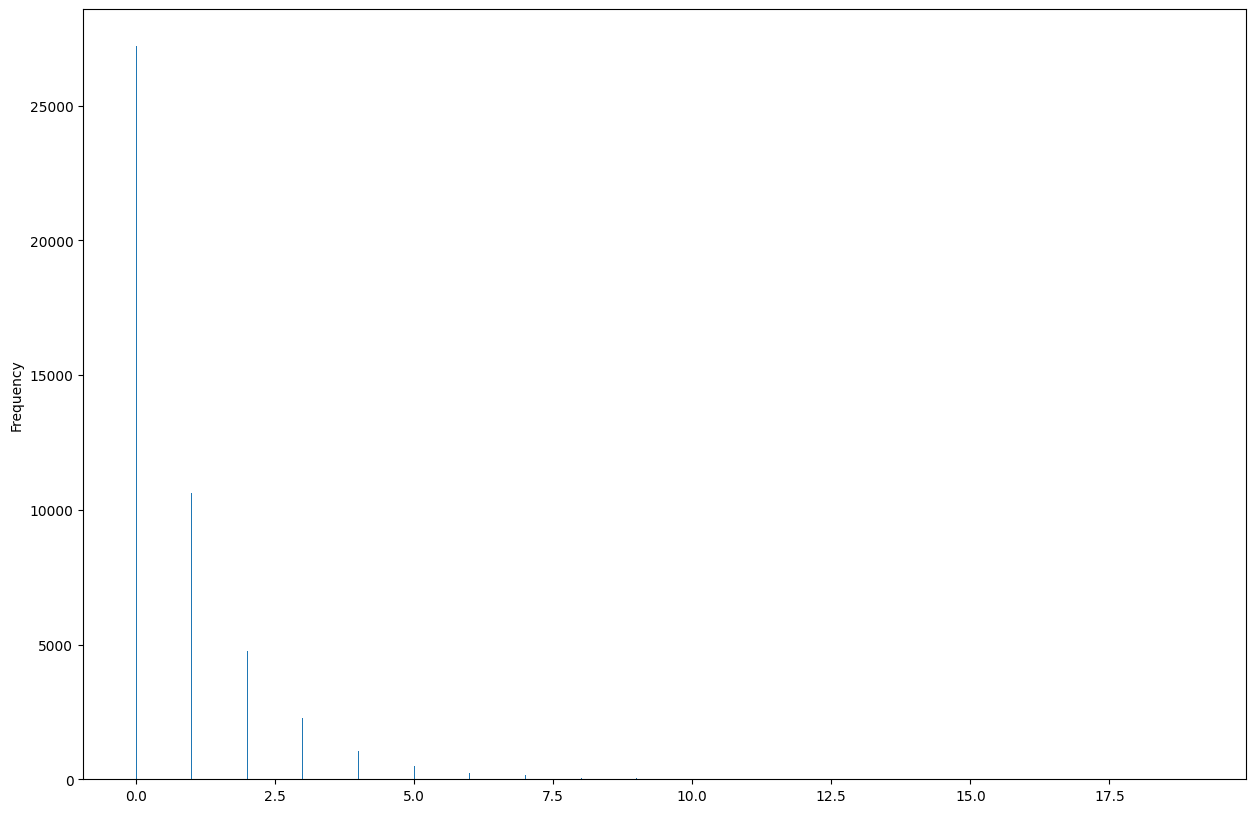

In [7]:
train['bildirimli_sum'].plot(kind='hist',bins=1000,figsize=(15,10))

<Axes: xlabel='tarih'>

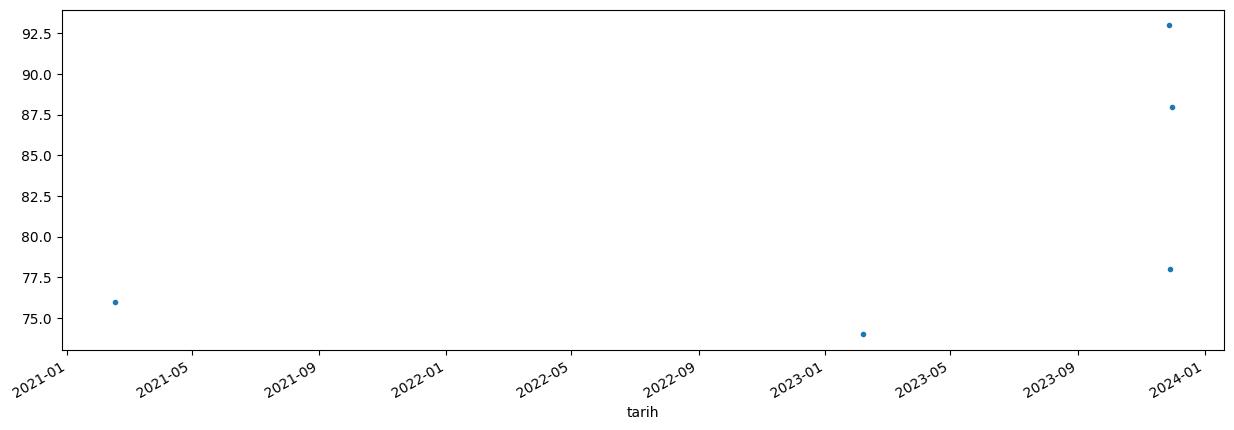

In [8]:
train['bildirimsiz_sum'].loc[train['bildirimsiz_sum']>70].plot(figsize=(15,5),style='.')

In [9]:
train=train.query('bildirimsiz_sum < 70').copy()

In [10]:
train

,ilce_0,ilce_1,bildirimsiz_sum,bildirimli_sum,t_2m:C_min,t_2m:C_max,t_2m:C_mean,effective_cloud_cover:p_min,effective_cloud_cover:p_max,effective_cloud_cover:p_mean,...,prob_precip_1h:p_mean,t_apparent:C_min,t_apparent:C_max,t_apparent:C_mean,Bayram_Flag,day_of_week,month,year,quarter,day_of_year
tarih,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1,1,9,0,9.0,14.9,11.133333,30.5,75.0,53.241667,...,1.000000,8.4,17.8,11.837500,1,4,1,2021,1,1
2021-01-01,0,33,11,0,8.5,13.1,10.383333,17.7,81.3,49.275000,...,1.000000,7.5,15.7,10.637500,1,4,1,2021,1,1
2021-01-01,1,34,5,0,8.7,16.0,11.675000,3.1,76.0,45.533333,...,1.000000,8.3,19.4,12.558333,1,4,1,2021,1,1
2021-01-01,0,30,13,0,9.6,14.1,11.204167,31.1,96.5,72.825000,...,1.595833,9.0,16.7,11.804167,1,4,1,2021,1,1
2021-01-01,0,10,2,0,10.6,14.4,11.929167,29.3,87.7,62.087500,...,1.200000,10.7,16.9,12.645833,1,4,1,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03,0,19,1,0,11.8,18.3,14.679167,9.1,99.8,48.883333,...,1.825000,11.9,20.0,15.433333,0,2,1,2024,1,3
2024-01-03,0,20,6,2,8.4,16.8,12.041667,16.8,100.0,56.787500,...,2.212500,6.7,18.5,12.570833,0,2,1,2024,1,3
2024-01-03,0,21,1,0,12.1,18.3,14.987500,14.0,99.7,55.433333,...,1.000000,12.4,20.6,15.891667,0,2,1,2024,1,3


# Time Series CV

In [203]:
from sklearn.model_selection import TimeSeriesSplit
tss=TimeSeriesSplit(n_splits=5,test_size=1316,gap=1316*11)


In [204]:
train_df=train.copy()

In [205]:
tss.split(train)

<generator object TimeSeriesSplit.split at 0x0000017725EDBCA0>

In [206]:
# fig,axs=plt.subplots(5,1,figsize=(15,15),sharex=True)

# fold=0
# for train_idx, val_idx in tss.split(train_df):
#     train=train_df.iloc[train_idx]
#     val=train_df.iloc[val_idx]

#     train['bildirimsiz_sum'].plot(  ax=axs[fold],
#                                     label='Training Set',
#                                     title=f'Data Train/Test Split Fold {fold}')
#     val['bildirimsiz_sum'].plot(ax=axs[fold],label='Test Set')

#     axs[fold].axvline(val.index.min(),color='black',ls='--')
#     fold +=1
# plt.show()

# Lag Features

In [11]:
train

,ilce_0,ilce_1,bildirimsiz_sum,bildirimli_sum,t_2m:C_min,t_2m:C_max,t_2m:C_mean,effective_cloud_cover:p_min,effective_cloud_cover:p_max,effective_cloud_cover:p_mean,...,prob_precip_1h:p_mean,t_apparent:C_min,t_apparent:C_max,t_apparent:C_mean,Bayram_Flag,day_of_week,month,year,quarter,day_of_year
tarih,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1,1,9,0,9.0,14.9,11.133333,30.5,75.0,53.241667,...,1.000000,8.4,17.8,11.837500,1,4,1,2021,1,1
2021-01-01,0,33,11,0,8.5,13.1,10.383333,17.7,81.3,49.275000,...,1.000000,7.5,15.7,10.637500,1,4,1,2021,1,1
2021-01-01,1,34,5,0,8.7,16.0,11.675000,3.1,76.0,45.533333,...,1.000000,8.3,19.4,12.558333,1,4,1,2021,1,1
2021-01-01,0,30,13,0,9.6,14.1,11.204167,31.1,96.5,72.825000,...,1.595833,9.0,16.7,11.804167,1,4,1,2021,1,1
2021-01-01,0,10,2,0,10.6,14.4,11.929167,29.3,87.7,62.087500,...,1.200000,10.7,16.9,12.645833,1,4,1,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03,0,19,1,0,11.8,18.3,14.679167,9.1,99.8,48.883333,...,1.825000,11.9,20.0,15.433333,0,2,1,2024,1,3
2024-01-03,0,20,6,2,8.4,16.8,12.041667,16.8,100.0,56.787500,...,2.212500,6.7,18.5,12.570833,0,2,1,2024,1,3
2024-01-03,0,21,1,0,12.1,18.3,14.987500,14.0,99.7,55.433333,...,1.000000,12.4,20.6,15.891667,0,2,1,2024,1,3


In [12]:
test['ilce_1_2']=test['ilce_0'].astype(str)+'-'+test['ilce_1'].astype(str)
train['ilce_1_2']=train['ilce_0'].astype(str)+'-'+train['ilce_1'].astype(str)

In [13]:
train

,ilce_0,ilce_1,bildirimsiz_sum,bildirimli_sum,t_2m:C_min,t_2m:C_max,t_2m:C_mean,effective_cloud_cover:p_min,effective_cloud_cover:p_max,effective_cloud_cover:p_mean,...,t_apparent:C_min,t_apparent:C_max,t_apparent:C_mean,Bayram_Flag,day_of_week,month,year,quarter,day_of_year,ilce_1_2
tarih,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1,1,9,0,9.0,14.9,11.133333,30.5,75.0,53.241667,...,8.4,17.8,11.837500,1,4,1,2021,1,1,1-1
2021-01-01,0,33,11,0,8.5,13.1,10.383333,17.7,81.3,49.275000,...,7.5,15.7,10.637500,1,4,1,2021,1,1,0-33
2021-01-01,1,34,5,0,8.7,16.0,11.675000,3.1,76.0,45.533333,...,8.3,19.4,12.558333,1,4,1,2021,1,1,1-34
2021-01-01,0,30,13,0,9.6,14.1,11.204167,31.1,96.5,72.825000,...,9.0,16.7,11.804167,1,4,1,2021,1,1,0-30
2021-01-01,0,10,2,0,10.6,14.4,11.929167,29.3,87.7,62.087500,...,10.7,16.9,12.645833,1,4,1,2021,1,1,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03,0,19,1,0,11.8,18.3,14.679167,9.1,99.8,48.883333,...,11.9,20.0,15.433333,0,2,1,2024,1,3,0-19
2024-01-03,0,20,6,2,8.4,16.8,12.041667,16.8,100.0,56.787500,...,6.7,18.5,12.570833,0,2,1,2024,1,3,0-20
2024-01-03,0,21,1,0,12.1,18.3,14.987500,14.0,99.7,55.433333,...,12.4,20.6,15.891667,0,2,1,2024,1,3,0-21


In [14]:
ilceler=['0-10', '0-11', '0-12', '0-14', '0-15', '0-16', '0-19', '0-20',
       '0-21', '0-22', '0-23', '0-24', '0-25', '0-27', '0-3', '0-30',
       '0-31', '0-32', '0-33', '0-37', '0-39', '0-4', '0-42', '0-43',
       '0-45', '0-5', '0-6', '0-7', '0-8', '0-9', '1-0', '1-1', '1-13',
       '1-17', '1-18', '1-2', '1-26', '1-28', '1-29', '1-34', '1-35',
       '1-36', '1-38', '1-40', '1-41', '1-44', '1-46']

In [15]:
train['is_train']=1
test['is_train']=0
all_df=pd.concat([train,test],axis=0)

In [16]:
train

,ilce_0,ilce_1,bildirimsiz_sum,bildirimli_sum,t_2m:C_min,t_2m:C_max,t_2m:C_mean,effective_cloud_cover:p_min,effective_cloud_cover:p_max,effective_cloud_cover:p_mean,...,t_apparent:C_max,t_apparent:C_mean,Bayram_Flag,day_of_week,month,year,quarter,day_of_year,ilce_1_2,is_train
tarih,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1,1,9,0,9.0,14.9,11.133333,30.5,75.0,53.241667,...,17.8,11.837500,1,4,1,2021,1,1,1-1,1
2021-01-01,0,33,11,0,8.5,13.1,10.383333,17.7,81.3,49.275000,...,15.7,10.637500,1,4,1,2021,1,1,0-33,1
2021-01-01,1,34,5,0,8.7,16.0,11.675000,3.1,76.0,45.533333,...,19.4,12.558333,1,4,1,2021,1,1,1-34,1
2021-01-01,0,30,13,0,9.6,14.1,11.204167,31.1,96.5,72.825000,...,16.7,11.804167,1,4,1,2021,1,1,0-30,1
2021-01-01,0,10,2,0,10.6,14.4,11.929167,29.3,87.7,62.087500,...,16.9,12.645833,1,4,1,2021,1,1,0-10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03,0,19,1,0,11.8,18.3,14.679167,9.1,99.8,48.883333,...,20.0,15.433333,0,2,1,2024,1,3,0-19,1
2024-01-03,0,20,6,2,8.4,16.8,12.041667,16.8,100.0,56.787500,...,18.5,12.570833,0,2,1,2024,1,3,0-20,1
2024-01-03,0,21,1,0,12.1,18.3,14.987500,14.0,99.7,55.433333,...,20.6,15.891667,0,2,1,2024,1,3,0-21,1


In [17]:
def lag_features(df, ilceler):
    temp_dfs = []  # List to hold temporary DataFrames
    df['date'] = pd.to_datetime(df.index)  # Convert index to datetime
    for i in ilceler:
        temp_df = df.query(f'ilce_1_2 == "{i}"')
        target_map = temp_df['bildirimsiz_sum'].to_dict()
        temp_df.index = pd.to_datetime(temp_df.index)  # Convert index to datetime if not already
        temp_df['lag_1_month'] = (temp_df.index - pd.Timedelta('30 days')).map(target_map)
        temp_df['lag_3_month'] = (temp_df.index - pd.Timedelta('90 days')).map(target_map)
        temp_df['lag_1_year'] = (temp_df.index - pd.Timedelta('362 days')).map(target_map)
        temp_df['lag_1_year_2'] = (temp_df.index - pd.Timedelta('363 days')).map(target_map)
        temp_df['lag_1_year_3'] = (temp_df.index - pd.Timedelta('364 days')).map(target_map)
        temp_df['lag_1_year_4'] = (temp_df.index - pd.Timedelta('365 days')).map(target_map)
        temp_df['lag_1_year_4'] = (temp_df.index - pd.Timedelta('366 days')).map(target_map)
        temp_df['lag_2_year'] = (temp_df.index - pd.Timedelta('728 days')).map(target_map)
        
        temp_dfs.append(temp_df[['lag_1_month','lag_3_month', 'lag_1_year', 'lag_1_year_2', 'lag_1_year_3', 'lag_1_year_4','lag_2_year', 'date', 'ilce_1_2']])
    
    # Concatenate all temp DataFrames
    all_temp_df = pd.concat(temp_dfs)
    # Merge once outside the loop
    df = df.merge(all_temp_df, on=['date', 'ilce_1_2'], how='left')
    
    return df


In [18]:
all_df_lag=lag_features(all_df,ilceler=ilceler)

C:\Users\enesm\AppData\Local\Temp\ipykernel_6248\811403901.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['lag_1_month'] = (temp_df.index - pd.Timedelta('30 days')).map(target_map)
C:\Users\enesm\AppData\Local\Temp\ipykernel_6248\811403901.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['lag_3_month'] = (temp_df.index - pd.Timedelta('90 days')).map(target_map)
C:\Users\enesm\AppData\Local\Temp\ipykernel_6248\811403901.py:10: SettingWithCopyWarning: 
A value is trying to be set on a 

In [19]:
train=all_df_lag.query('is_train==1')
test=all_df_lag.query('is_train==0')

In [20]:
train

,ilce_0,ilce_1,bildirimsiz_sum,bildirimli_sum,t_2m:C_min,t_2m:C_max,t_2m:C_mean,effective_cloud_cover:p_min,effective_cloud_cover:p_max,effective_cloud_cover:p_mean,...,ilce_1_2,is_train,date,lag_1_month,lag_3_month,lag_1_year,lag_1_year_2,lag_1_year_3,lag_1_year_4,lag_2_year
0,1,1,9.0,0,9.0,14.9,11.133333,30.5,75.0,53.241667,...,1-1,1,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,33,11.0,0,8.5,13.1,10.383333,17.7,81.3,49.275000,...,0-33,1,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,34,5.0,0,8.7,16.0,11.675000,3.1,76.0,45.533333,...,1-34,1,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,30,13.0,0,9.6,14.1,11.204167,31.1,96.5,72.825000,...,0-30,1,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,10,2.0,0,10.6,14.4,11.929167,29.3,87.7,62.087500,...,0-10,1,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46934,0,19,1.0,0,11.8,18.3,14.679167,9.1,99.8,48.883333,...,0-19,1,2024-01-03,10.0,3.0,NaN,1.0,1.0,1.0,NaN
46935,0,20,6.0,2,8.4,16.8,12.041667,16.8,100.0,56.787500,...,0-20,1,2024-01-03,7.0,5.0,2.0,0.0,6.0,4.0,4.0
46936,0,21,1.0,0,12.1,18.3,14.987500,14.0,99.7,55.433333,...,0-21,1,2024-01-03,8.0,1.0,4.0,3.0,3.0,7.0,5.0
46937,0,23,1.0,0,9.1,15.6,12.083333,0.4,100.0,45.900000,...,0-23,1,2024-01-03,1.0,3.0,3.0,2.0,4.0,4.0,8.0


In [21]:
test

,ilce_0,ilce_1,bildirimsiz_sum,bildirimli_sum,t_2m:C_min,t_2m:C_max,t_2m:C_mean,effective_cloud_cover:p_min,effective_cloud_cover:p_max,effective_cloud_cover:p_mean,...,ilce_1_2,is_train,date,lag_1_month,lag_3_month,lag_1_year,lag_1_year_2,lag_1_year_3,lag_1_year_4,lag_2_year
46939,1,1,NaN,0,8.4,17.0,12.425000,0.0,95.5,38.841667,...,1-1,0,2024-01-04,7.0,1.0,4.0,4.0,9.0,4.0,6.0
46940,1,2,NaN,1,8.9,17.5,12.912500,9.7,99.9,59.437500,...,1-2,0,2024-01-04,7.0,4.0,1.0,1.0,4.0,NaN,4.0
46941,1,13,NaN,0,7.2,11.1,8.620833,37.7,100.0,83.816667,...,1-13,0,2024-01-04,NaN,2.0,1.0,1.0,1.0,1.0,NaN
46942,1,17,NaN,0,9.2,17.7,13.187500,1.0,98.6,46.291667,...,1-17,0,2024-01-04,NaN,NaN,NaN,1.0,NaN,1.0,NaN
46943,1,18,NaN,0,6.3,13.3,9.441667,36.3,100.0,76.104167,...,1-18,0,2024-01-04,4.0,5.0,3.0,NaN,0.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48250,0,4,NaN,0,4.5,11.0,7.133333,0.0,95.1,19.504167,...,0-4,0,2024-01-31,1.0,0.0,1.0,1.0,2.0,1.0,6.0
48251,0,8,NaN,0,1.6,10.8,5.670833,0.0,75.5,22.491667,...,0-8,0,2024-01-31,NaN,NaN,NaN,NaN,NaN,NaN,4.0
48252,0,32,NaN,0,4.8,11.5,7.466667,0.0,94.4,16.250000,...,0-32,0,2024-01-31,NaN,1.0,0.0,1.0,1.0,1.0,3.0
48253,1,0,NaN,0,-1.4,8.8,2.841667,0.0,13.9,2.883333,...,1-0,0,2024-01-31,2.0,2.0,2.0,4.0,3.0,NaN,NaN


In [22]:
train=train.drop('is_train',axis=1)
test=test.drop('is_train',axis=1)

In [23]:
train=train.set_index('date')
test=test.set_index('date')

In [24]:
test.drop('bildirimsiz_sum',axis=1,inplace=True)

# Cross Validation

In [25]:
train=train.drop('ilce_1_2',axis=1)
test=test.drop('ilce_1_2',axis=1)

In [26]:
train.columns

Index(['ilce_0', 'ilce_1', 'bildirimsiz_sum', 'bildirimli_sum', 't_2m:C_min',
       't_2m:C_max', 't_2m:C_mean', 'effective_cloud_cover:p_min',
       'effective_cloud_cover:p_max', 'effective_cloud_cover:p_mean',
       'global_rad:W_min', 'global_rad:W_max', 'global_rad:W_mean',
       'relative_humidity_2m:p_min', 'relative_humidity_2m:p_max',
       'relative_humidity_2m:p_mean', 'wind_dir_10m:d_min',
       'wind_dir_10m:d_max', 'wind_dir_10m:d_mean', 'wind_speed_10m:ms_min',
       'wind_speed_10m:ms_max', 'wind_speed_10m:ms_mean',
       'prob_precip_1h:p_min', 'prob_precip_1h:p_max', 'prob_precip_1h:p_mean',
       't_apparent:C_min', 't_apparent:C_max', 't_apparent:C_mean',
       'Bayram_Flag', 'day_of_week', 'month', 'year', 'quarter', 'day_of_year',
       'lag_1_month', 'lag_3_month', 'lag_1_year', 'lag_1_year_2',
       'lag_1_year_3', 'lag_1_year_4', 'lag_2_year'],
      dtype='object')

In [27]:
FEATURES=['ilce_0', 'ilce_1', 'bildirimli_sum', 't_2m:C_min',
       't_2m:C_max', 't_2m:C_mean', 'effective_cloud_cover:p_min',
       'effective_cloud_cover:p_max', 'effective_cloud_cover:p_mean',
       'global_rad:W_min', 'global_rad:W_max', 'global_rad:W_mean',
       'relative_humidity_2m:p_min', 'relative_humidity_2m:p_max',
       'relative_humidity_2m:p_mean', 'wind_dir_10m:d_min',
       'wind_dir_10m:d_max', 'wind_dir_10m:d_mean', 'wind_speed_10m:ms_min',
       'wind_speed_10m:ms_max', 'wind_speed_10m:ms_mean',
       'prob_precip_1h:p_min', 'prob_precip_1h:p_max', 'prob_precip_1h:p_mean',
       't_apparent:C_min', 't_apparent:C_max', 't_apparent:C_mean',
       'Bayram_Flag', 'day_of_week', 'month', 'year', 'quarter', 'day_of_year',
        'lag_1_month','lag_3_month', 'lag_1_year', 'lag_1_year_2',
       'lag_1_year_3', 'lag_1_year_4', 'lag_2_year']

TARGET=['bildirimsiz_sum']

# Data iyi validation set al sadece tek ayı predictliyorsun bu şekilde bir validasyon ve 1 yıl önceki verilerin lagı çok önemli olabilir. 364 değil 365 366 falan da bak. 

In [28]:
df=train.copy()

# XGBoost

In [227]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 
tss = TimeSeriesSplit(n_splits=5,test_size=1316)

fold=0
preds=[]
scores=[]

for train_idx , val_idx in tss.split(df):
    train= df.iloc[train_idx]
    val=df.iloc[val_idx]

    X_train=train[FEATURES]
    y_train=train[TARGET]

    X_val=val[FEATURES]
    y_val=val[TARGET] 

   
    reg=XGBRegressor(booster='gbtree',
    n_estimators=2000,
    early_stopping_rounds=50,
    learning_rate=0.01,
    max_depth=10)

    reg.fit(X_train,y_train,
    eval_set=[(X_train,y_train),(X_val,y_val)],
    verbose=50)

    y_pred=reg.predict(X_val)
    preds.append(y_pred)
    score=mean_absolute_error(y_val,y_pred)
    scores.append(score)

print(f'Score across folds {np.mean(scores):0.4f}, Std_dev={np.std(scores):0.4f}')
print(f'Fold scores{scores}')

[0]	validation_0-rmse:5.34778	validation_1-rmse:4.67314
[50]	validation_0-rmse:4.48232	validation_1-rmse:4.14888
[100]	validation_0-rmse:3.92762	validation_1-rmse:3.94694
[150]	validation_0-rmse:3.55310	validation_1-rmse:3.87605
[200]	validation_0-rmse:3.25806	validation_1-rmse:3.85651
[250]	validation_0-rmse:3.02088	validation_1-rmse:3.85440
[275]	validation_0-rmse:2.91984	validation_1-rmse:3.85449
[0]	validation_0-rmse:5.32761	validation_1-rmse:3.96167
[50]	validation_0-rmse:4.47064	validation_1-rmse:3.53698
[100]	validation_0-rmse:3.91760	validation_1-rmse:3.33790
[150]	validation_0-rmse:3.54190	validation_1-rmse:3.24459
[200]	validation_0-rmse:3.27122	validation_1-rmse:3.18920
[250]	validation_0-rmse:3.04837	validation_1-rmse:3.17453
[300]	validation_0-rmse:2.86478	validation_1-rmse:3.15676
[350]	validation_0-rmse:2.72716	validation_1-rmse:3.15305
[400]	validation_0-rmse:2.61841	validation_1-rmse:3.14942
[450]	validation_0-rmse:2.53190	validation_1-rmse:3.14572
[500]	validation_0-r

Score across folds 2.9158, Std_dev=0.6232
Fold scores[2.9277367939702645, 2.2972598594916267, 2.4044965451249234, 4.054756819681012, 2.894886185332997]

1.37 
Score across folds 2.8158, Std_dev=0.5009
Fold scores[2.4728504792535198, 2.373847020252135, 2.6423787856899135, 2.858527900509559, 3.2312626810149943, 2.9277367939702645, 2.2972598594916267, 2.4044965451249234, 4.054756819681012, 2.894886185332997]

 reg=XGBRegressor(booster='gbtree',
    n_estimators=2000,
    early_stopping_rounds=50,
    learning_rate=0.01,
    max_depth=10)

# Catboost

In [228]:
from catboost import CatBoostRegressor
tss = TimeSeriesSplit(n_splits=5,test_size=1316)

fold=0
preds=[]
scores=[]

for train_idx , val_idx in tss.split(df):
    train= df.iloc[train_idx]
    val=df.iloc[val_idx]

    X_train=train[FEATURES]
    y_train=train[TARGET]

    X_val=val[FEATURES]
    y_val=val[TARGET] 

    reg=CatBoostRegressor(n_estimators=1000,early_stopping_rounds=50,colsample_bylevel=0.8,learning_rate=0.05
    )

    reg.fit(X_train,y_train,
    eval_set=[(X_train,y_train),(X_val,y_val)],
    verbose=50)

    y_pred=reg.predict(X_val)
    preds.append(y_pred)
    score=mean_absolute_error(y_val,y_pred)
    scores.append(score)

print(f'Score across folds {np.mean(scores):0.4f}, Std_dev={np.std(scores):0.4f}')
print(f'Fold scores{scores}')

0:	learn: 5.3235459	test: 5.3235459	test1: 4.6275864	best: 4.6275864 (0)	total: 7.41ms	remaining: 7.4s
50:	learn: 4.4688540	test: 4.4688540	test1: 3.9648071	best: 3.9648071 (50)	total: 438ms	remaining: 8.15s
100:	learn: 4.2477425	test: 4.2477425	test1: 3.8753242	best: 3.8753242 (100)	total: 846ms	remaining: 7.53s
150:	learn: 4.1116566	test: 4.1116566	test1: 3.8352487	best: 3.8331931 (145)	total: 1.24s	remaining: 6.99s
200:	learn: 4.0127150	test: 4.0127150	test1: 3.8175353	best: 3.8175353 (200)	total: 1.64s	remaining: 6.52s
250:	learn: 3.9121147	test: 3.9121147	test1: 3.8180268	best: 3.8136336 (209)	total: 2.04s	remaining: 6.08s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 3.813633648
bestIteration = 209

Shrink model to first 210 iterations.
0:	learn: 5.3066603	test: 5.3066603	test1: 3.9417948	best: 3.9417948 (0)	total: 8.22ms	remaining: 8.22s
50:	learn: 4.4656793	test: 4.4656793	test1: 3.3039961	best: 3.3039961 (50)	total: 423ms	remaining: 7.87s
100:	learn: 4.2368

In [ ]:
Score across folds 2.9601, Std_dev=0.5972
Fold scores[2.8515044757303682, 2.2954341670719685, 2.4949933138581812, 3.9955789194799434, 3.163003619825275]

# LightGBM

In [229]:
df.columns = [col.replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace(':', '_') for col in df.columns]

In [230]:
df.columns

Index(['ilce_0', 'ilce_1', 'bildirimsiz_sum', 'bildirimli_sum', 't_2m_C_min',
       't_2m_C_max', 't_2m_C_mean', 'effective_cloud_cover_p_min',
       'effective_cloud_cover_p_max', 'effective_cloud_cover_p_mean',
       'global_rad_W_min', 'global_rad_W_max', 'global_rad_W_mean',
       'relative_humidity_2m_p_min', 'relative_humidity_2m_p_max',
       'relative_humidity_2m_p_mean', 'wind_dir_10m_d_min',
       'wind_dir_10m_d_max', 'wind_dir_10m_d_mean', 'wind_speed_10m_ms_min',
       'wind_speed_10m_ms_max', 'wind_speed_10m_ms_mean',
       'prob_precip_1h_p_min', 'prob_precip_1h_p_max', 'prob_precip_1h_p_mean',
       't_apparent_C_min', 't_apparent_C_max', 't_apparent_C_mean',
       'Bayram_Flag', 'day_of_week', 'month', 'year', 'quarter', 'day_of_year',
       'lag_1_month', 'lag_3_month', 'lag_1_year', 'lag_1_year_2',
       'lag_1_year_3', 'lag_1_year_4', 'lag_2_year'],
      dtype='object')

In [231]:
FEATURES=['ilce_0', 'ilce_1',  'bildirimli_sum', 't_2m_C_min',
       't_2m_C_max', 't_2m_C_mean', 'effective_cloud_cover_p_min',
       'effective_cloud_cover_p_max', 'effective_cloud_cover_p_mean',
       'global_rad_W_min', 'global_rad_W_max', 'global_rad_W_mean',
       'relative_humidity_2m_p_min', 'relative_humidity_2m_p_max',
       'relative_humidity_2m_p_mean', 'wind_dir_10m_d_min',
       'wind_dir_10m_d_max', 'wind_dir_10m_d_mean', 'wind_speed_10m_ms_min',
       'wind_speed_10m_ms_max', 'wind_speed_10m_ms_mean',
       'prob_precip_1h_p_min', 'prob_precip_1h_p_max', 'prob_precip_1h_p_mean',
       't_apparent_C_min', 't_apparent_C_max', 't_apparent_C_mean',
       'Bayram_Flag', 'day_of_week', 'month', 'year', 'quarter', 'day_of_year',
       'lag_1_month', 'lag_3_month', 'lag_1_year', 'lag_2_year']
TARGET=['bildirimsiz_sum',]

In [233]:
df

,ilce_0,ilce_1,bildirimsiz_sum,bildirimli_sum,t_2m_C_min,t_2m_C_max,t_2m_C_mean,effective_cloud_cover_p_min,effective_cloud_cover_p_max,effective_cloud_cover_p_mean,...,year,quarter,day_of_year,lag_1_month,lag_3_month,lag_1_year,lag_1_year_2,lag_1_year_3,lag_1_year_4,lag_2_year
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1,1,9.0,0,9.0,14.9,11.133333,30.5,75.0,53.241667,...,2021,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,0,33,11.0,0,8.5,13.1,10.383333,17.7,81.3,49.275000,...,2021,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,1,34,5.0,0,8.7,16.0,11.675000,3.1,76.0,45.533333,...,2021,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,0,30,13.0,0,9.6,14.1,11.204167,31.1,96.5,72.825000,...,2021,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,0,10,2.0,0,10.6,14.4,11.929167,29.3,87.7,62.087500,...,2021,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03,0,19,1.0,0,11.8,18.3,14.679167,9.1,99.8,48.883333,...,2024,1,3,10.0,3.0,NaN,1.0,1.0,1.0,NaN
2024-01-03,0,20,6.0,2,8.4,16.8,12.041667,16.8,100.0,56.787500,...,2024,1,3,7.0,5.0,2.0,0.0,6.0,4.0,4.0
2024-01-03,0,21,1.0,0,12.1,18.3,14.987500,14.0,99.7,55.433333,...,2024,1,3,8.0,1.0,4.0,3.0,3.0,7.0,5.0


In [236]:
from lightgbm import LGBMRegressor
tss = TimeSeriesSplit(n_splits=5,test_size=1316)

fold=0
preds=[]
scores=[]

for train_idx , val_idx in tss.split(df):
    train= df.iloc[train_idx]
    val=df.iloc[val_idx]

    X_train=train[FEATURES]
    y_train=train[TARGET]

    X_val=val[FEATURES]
    y_val=val[TARGET] 

    reg=LGBMRegressor(max_depth=5
    )

    reg.fit(X_train,y_train,
    eval_set=[(X_train,y_train),(X_val,y_val)],
    )

    y_pred=reg.predict(X_val)
    preds.append(y_pred)
    score=mean_absolute_error(y_val,y_pred)
    scores.append(score)

print(f'Score across folds {np.mean(scores):0.4f}, Std_dev={np.std(scores):0.4f}')
print(f'Fold scores{scores}')

Score across folds 2.8737, Std_dev=0.6307
Fold scores[2.7715899333815934, 2.2586637046331446, 2.4034201681046965, 4.048031920218564, 2.8868663862064894]


In [253]:
TARGET

['bildirimsiz_sum']

In [254]:
FEATURES

['ilce_0',
 'ilce_1',
 'bildirimli_sum',
 't_2m_C_min',
 't_2m_C_max',
 't_2m_C_mean',
 'effective_cloud_cover_p_min',
 'effective_cloud_cover_p_max',
 'effective_cloud_cover_p_mean',
 'global_rad_W_min',
 'global_rad_W_max',
 'global_rad_W_mean',
 'relative_humidity_2m_p_min',
 'relative_humidity_2m_p_max',
 'relative_humidity_2m_p_mean',
 'wind_dir_10m_d_min',
 'wind_dir_10m_d_max',
 'wind_dir_10m_d_mean',
 'wind_speed_10m_ms_min',
 'wind_speed_10m_ms_max',
 'wind_speed_10m_ms_mean',
 'prob_precip_1h_p_min',
 'prob_precip_1h_p_max',
 'prob_precip_1h_p_mean',
 't_apparent_C_min',
 't_apparent_C_max',
 't_apparent_C_mean',
 'Bayram_Flag',
 'day_of_week',
 'month',
 'year',
 'quarter',
 'day_of_year',
 'lag_1_month',
 'lag_3_month',
 'lag_1_year',
 'lag_2_year']

In [29]:
import lofo
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import LGBMRegressor

# Assuming 'df' is your full dataset and FEATURES and TARGET are defined
dataset = lofo.Dataset(df=df, target=TARGET, features=FEATURES)

# Define the model
model = LGBMRegressor(max_depth=5)

# Define the validation scheme
cv = TimeSeriesSplit(n_splits=5,test_size=1316)


c:\Users\enesm\AppData\Local\Programs\Python\Python310\lib\site-packages\lofo\lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
C:\Users\enesm\AppData\Roaming\Python\Python310\site-packages\cupy\_environment.py:447: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda11x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed 

In [30]:

# Instantiate LOFO Importance
lofo_imp = lofo.LOFOImportance(dataset, model, cv=cv,scoring='roc_auc')


TypeError: LOFOImportance.__init__() got multiple values for argument 'scoring'

In [271]:

# Get feature importances
importance_df = lofo_imp.get_importance()

# Plot feature importances
plot_importance(importance_df, figsize=(12, 7))


InvalidParameterError: The 'scoring' parameter of cross_validate must be a str among {'f1_macro', 'roc_auc', 'neg_mean_poisson_deviance', 'neg_root_mean_squared_error', 'recall_samples', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_log_error', 'neg_mean_squared_error', 'precision_micro', 'jaccard', 'matthews_corrcoef', 'roc_auc_ovr', 'balanced_accuracy', 'explained_variance', 'homogeneity_score', 'recall_weighted', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'r2', 'recall', 'neg_mean_absolute_percentage_error', 'mutual_info_score', 'neg_brier_score', 'precision_macro', 'precision_weighted', 'jaccard_samples', 'completeness_score', 'fowlkes_mallows_score', 'roc_auc_ovo', 'jaccard_weighted', 'jaccard_macro', 'neg_median_absolute_error', 'average_precision', 'precision_samples', 'recall_micro', 'roc_auc_ovr_weighted', 'neg_log_loss', 'f1_micro', 'precision', 'f1_weighted', 'f1_samples', 'normalized_mutual_info_score', 'top_k_accuracy', 'neg_root_mean_squared_log_error', 'jaccard_micro', 'adjusted_mutual_info_score', 'neg_mean_gamma_deviance', 'roc_auc_ovo_weighted', 'accuracy', 'rand_score', 'recall_macro', 'f1', 'adjusted_rand_score', 'v_measure_score'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got LGBMRegressor(max_depth=5) instead.

In [ ]:
Score across folds 2.8582, Std_dev=0.6299
Fold scores[2.7459318519908225, 2.289879962918478, 2.3731123164711394, 4.046553314445134, 2.835666762999152]

In [66]:
train

,ilce_0,ilce_1,bildirimsiz_sum,bildirimli_sum,t_2m:C_min,t_2m:C_max,t_2m:C_mean,effective_cloud_cover:p_min,effective_cloud_cover:p_max,effective_cloud_cover:p_mean,...,Bayram_Flag,day_of_week,month,year,quarter,day_of_year,lag_1_month,lag_3_month,lag_1_year,lag_2_year
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1,1,9.0,0,9.0,14.9,11.133333,30.5,75.0,53.241667,...,1,4,1,2021,1,1,NaN,NaN,NaN,NaN
2021-01-01,0,33,11.0,0,8.5,13.1,10.383333,17.7,81.3,49.275000,...,1,4,1,2021,1,1,NaN,NaN,NaN,NaN
2021-01-01,1,34,5.0,0,8.7,16.0,11.675000,3.1,76.0,45.533333,...,1,4,1,2021,1,1,NaN,NaN,NaN,NaN
2021-01-01,0,30,13.0,0,9.6,14.1,11.204167,31.1,96.5,72.825000,...,1,4,1,2021,1,1,NaN,NaN,NaN,NaN
2021-01-01,0,10,2.0,0,10.6,14.4,11.929167,29.3,87.7,62.087500,...,1,4,1,2021,1,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-05,0,42,4.0,3,24.5,38.8,30.870833,0.0,1.2,0.145833,...,0,5,8,2023,3,217,34.0,2.0,3.0,12.0
2023-08-05,1,44,10.0,3,24.8,42.1,33.316667,0.0,10.9,1.100000,...,0,5,8,2023,3,217,20.0,2.0,10.0,9.0
2023-08-05,1,41,3.0,0,24.1,40.2,30.979167,0.0,17.5,1.525000,...,0,5,8,2023,3,217,4.0,4.0,8.0,3.0


In [58]:
test

,ilce_0,ilce_1,bildirimli_sum,t_2m:C_min,t_2m:C_max,t_2m:C_mean,effective_cloud_cover:p_min,effective_cloud_cover:p_max,effective_cloud_cover:p_mean,global_rad:W_min,...,Bayram_Flag,day_of_week,month,year,quarter,day_of_year,lag_1_month,lag_3_month,lag_1_year,lag_2_year
date,,,,,,,,,,,,,,,,,,,,,
2024-01-04,1,1,0,8.4,17.0,12.425000,0.0,95.5,38.841667,0.0,...,0,3,1,2024,1,4,7.0,1.0,9.0,6.0
2024-01-04,1,2,1,8.9,17.5,12.912500,9.7,99.9,59.437500,0.0,...,0,3,1,2024,1,4,7.0,4.0,4.0,4.0
2024-01-04,1,13,0,7.2,11.1,8.620833,37.7,100.0,83.816667,0.0,...,0,3,1,2024,1,4,NaN,2.0,1.0,NaN
2024-01-04,1,17,0,9.2,17.7,13.187500,1.0,98.6,46.291667,0.0,...,0,3,1,2024,1,4,NaN,NaN,NaN,NaN
2024-01-04,1,18,0,6.3,13.3,9.441667,36.3,100.0,76.104167,0.0,...,0,3,1,2024,1,4,4.0,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,0,4,0,4.5,11.0,7.133333,0.0,95.1,19.504167,0.0,...,0,2,1,2024,1,31,1.0,0.0,2.0,6.0
2024-01-31,0,8,0,1.6,10.8,5.670833,0.0,75.5,22.491667,0.0,...,0,2,1,2024,1,31,NaN,NaN,NaN,4.0
2024-01-31,0,32,0,4.8,11.5,7.466667,0.0,94.4,16.250000,0.0,...,0,2,1,2024,1,31,NaN,1.0,1.0,3.0


# Lofo

In [237]:
import lofo_feature_importance

ModuleNotFoundError: No module named 'lofo_feature_importance'

# Train with all data

In [37]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 


X_all=df[FEATURES]
y_all=df[TARGET]


reg=XGBRegressor(booster='gbtree',
    n_estimators=579
   
    learning_rate=0.05,
    max_depth=5,
    colsample_bytree=0.8)
reg.fit(X_train,y_train,
eval_set=[(X_all,y_all)],
verbose=50)



SyntaxError: invalid syntax. Perhaps you forgot a comma? (2896988492.py, line 10)

# Predict

In [ ]:
sample_sub=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\GDZ\Data\Raw\sample_submission.csv')

In [ ]:
sample_sub

,unique_id,bildirimsiz_sum
0,2024-01-04-manisa-akhisar,NaN
1,2024-01-04-manisa-alasehir,NaN
2,2024-01-04-manisa-demirci,NaN
3,2024-01-04-manisa-golmarmara,NaN
4,2024-01-04-manisa-gordes,NaN
...,...,...
1311,2024-01-31-izmir-balcova,NaN
1312,2024-01-31-izmir-beydag,NaN
1313,2024-01-31-izmir-narlidere,NaN
1314,2024-01-31-manisa-ahmetli,NaN


In [ ]:
preds=reg.predict(test)

In [ ]:
sample_sub.bildirimsiz_sum=preds
sample_sub

,unique_id,bildirimsiz_sum
0,2024-01-04-manisa-akhisar,5.811176
1,2024-01-04-manisa-alasehir,5.803397
2,2024-01-04-manisa-demirci,0.703447
3,2024-01-04-manisa-golmarmara,1.374414
4,2024-01-04-manisa-gordes,3.726919
...,...,...
1311,2024-01-31-izmir-balcova,2.846074
1312,2024-01-31-izmir-beydag,2.447189
1313,2024-01-31-izmir-narlidere,2.717662
1314,2024-01-31-manisa-ahmetli,1.866000


<Axes: title={'center': 'Future_Predictions'}>

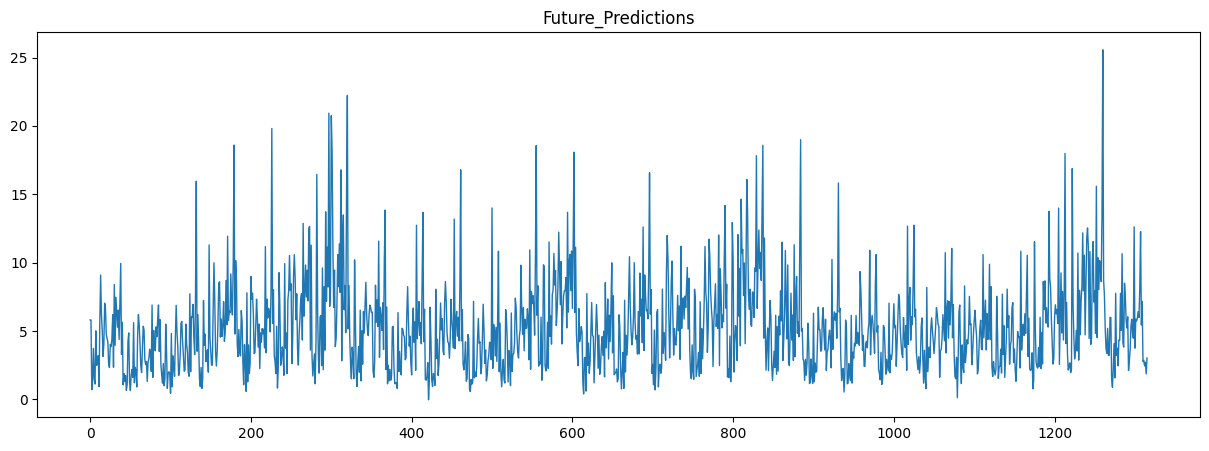

In [ ]:
sample_sub['bildirimsiz_sum'].plot(figsize=(15,5),ms=1,lw=1,title='Future_Predictions')

In [317]:
sample_sub.to_csv('submission_colsample_5fold_v4_enyüksekearlystopping.csv',index=False)